In [38]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson

In [39]:
def f(x):
    return 4 / (1 + x ** 2)

real_integral_val = np.pi
domain = (0, 1)
a, b = domain
m_range = np.arange(1, 26)

In [40]:
def quad_int(x_vec, fun):
    s = 0
    for i in range(len(x_vec) - 1):
        dx = x_vec[i + 1] - x_vec[i]
        x = (x_vec[i + 1] + x_vec[i]) / 2
        s += fun(x) * dx
    return s

In [41]:
quad_err = []
trap_err = []
simps_err = []
for m in m_range:
    n = 2**m + 1
    x_vec = np.linspace(a, b, n, dtype=np.double)
    y_vec = f(x_vec)
    quad_val = quad_int(x_vec, f)
    trap_val = trapezoid(y_vec, x_vec)
    simps_val = simpson(y_vec, x_vec)
    quad_err.append((quad_val - real_integral_val) / real_integral_val)
    trap_err.append((trap_val - real_integral_val) / real_integral_val)
    simps_err.append((simps_val - real_integral_val) / real_integral_val)

quad_err = np.array(quad_err)
trap_err = np.array(trap_err)
simps_err = np.array(simps_err)

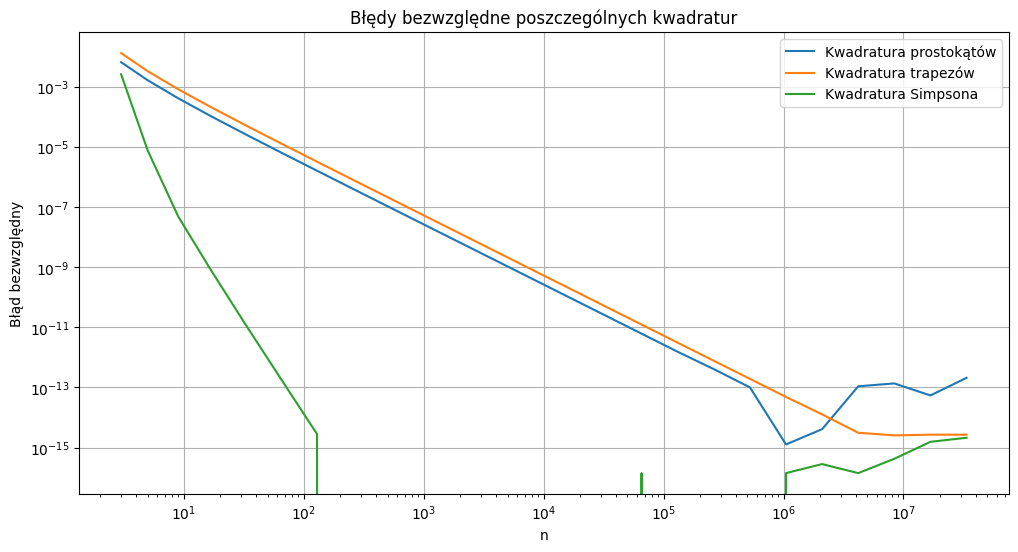

In [42]:
def plot_err(err_vec, label):
    n_vec = 2**m_range + 1
    plt.loglog(n_vec, abs(err_vec), label=label)

plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plot_err(quad_err, "Kwadratura prostokątów")
plot_err(trap_err, "Kwadratura trapezów")
plot_err(simps_err, "Kwadratura Simpsona")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
quad_n_min = min((err, i) for i, err in enumerate(quad_err))[1]
trap_n_min = min((err, i) for i, err in enumerate(trap_err))[1]
simps_n_min = min((err, i) for i, err in enumerate(simps_err))[1]
width = b - a
quad_h_min = width / quad_n_min
trap_h_min = width / trap_n_min
simps_h_min = width / simps_n_min
print(quad_h_min, trap_h_min, simps_h_min)
print(quad_n_min, trap_n_min, simps_n_min)

ZeroDivisionError: division by zero